In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
from tidy3d import web

14:55:02 ?????? WARNING: Structure at structures[0] was detected as being less  
                than half of a central wavelength from a PML on side z-min. To  
                avoid inaccurate results or divergence, please increase gap     
                between any structures and PML or fully extend structure through
                the pml.                                                        

                WARNING: Suppressed 4 WARNING messages.                         

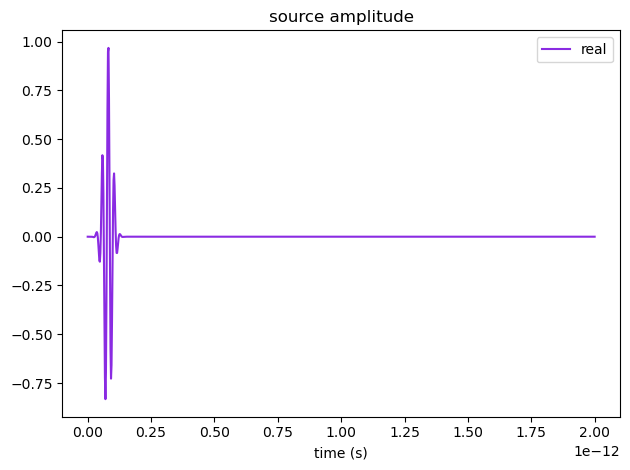

In [4]:
t_HxVO2 = 0.01
# t_HcVO2 = 0.1
t_VO2 = 0.02

# t is the thickness of HxVO2 in HcVO2
medium_HxVO2 = td.PoleResidue.from_file(r"F:\OneDrive - UW-Madison\python\tidy 3d\data\nkmodule\VO2-HT.json")
medium_VO2 = td.PoleResidue.from_file(r"F:\OneDrive - UW-Madison\python\tidy 3d\data\nkmodule\VO2-LT.json")
medium_Al2O3 = td.PoleResidue.from_file(r"F:\OneDrive - UW-Madison\python\tidy 3d\data\nkmodule\Al2O3.json")

wl_start = 5  # wavelength
wl_end = 15  # wavelength
freq_start = td.C_0 / wl_end
freq_end = td.C_0 / wl_start

freqs = np.linspace(freq_start, freq_end, 100)  # freqeucny range of the simulation
freq0 = (freq_start + freq_end) / 2  # central frequency
freqw = (freq_end - freq_start) / 2.0  # width of the frequency range

# distance between the surface of the sphere and the start of the PML layers along each cartesian direction
buffer_PML = 2
buffer_source = 1
w_size_xy = 0.05

domain_size_xy = w_size_xy

domain_size_z = buffer_PML + t_VO2 + t_HxVO2 + buffer_PML

# construct simulation size array
sim_size = (domain_size_xy, domain_size_xy, domain_size_z)

VO2_center = t_VO2 / 2
HxVO2_center = t_VO2 + t_HxVO2 / 2

Al2O3_center = -domain_size_z

t_Al2O3 = 2 * domain_size_z

slabs = []

slab_1 = td.Structure(
    geometry = td.Box(
        center = (0, 0, VO2_center),
        size = (td.inf, td.inf, t_VO2),
    ),
    medium = medium_VO2,
)

slab_2 = td.Structure(
    geometry = td.Box(
        center = (0, 0, HxVO2_center),
        size = (td.inf, td.inf, t_HxVO2),
    ),
    medium = medium_HxVO2,
)

slab_3 = td.Structure(
    geometry = td.Box(
        center = (0, 0, Al2O3_center),
        size = (td.inf, td.inf, t_Al2O3),
    ),
    medium = medium_Al2O3,
)

slabs = [slab_1, slab_2, slab_3]

source = td.PlaneWave(
    source_time=td.GaussianPulse(freq0=freq0, fwidth=0.5 * freqw),
    size=(td.inf, td.inf, 0),
    center=(0, 0, buffer_source),
    direction="-",
    pol_angle=0,
)

# add a flux monitor to detect reflection
monitor_r = td.FluxMonitor(
    center=[0, 0, buffer_source+buffer_PML / 2], size=[td.inf, td.inf, 0], freqs=freqs, name="R"
)

# add a flux monitor to detect transmission
monitor_t = td.FluxMonitor(
    center=[0, 0, -buffer_PML / 2], size=[td.inf, td.inf, 0], freqs=freqs, name="T"
)

# add a field monitor to see the field profile at the absorption peak frequency
monitor_field = td.FieldMonitor(
    center=[0, 0, 0], size=[td.inf, 0, td.inf], freqs=[freq0], name="field"
)
run_time = 2e-11  # simulation run time

# set up simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(wavelength = 5 * (t_HxVO2 + t_VO2)),
    structures=slabs,
    sources=[source],
    monitors=[monitor_r, monitor_t, monitor_field],
    run_time=run_time,
    boundary_spec=td.BoundarySpec(
        x=td.Boundary.periodic(), y=td.Boundary.periodic(), z=td.Boundary.pml()
    ),
)
source.source_time.plot(np.linspace(0, run_time/10, 1001))
plt.show()

Total number of grid points (millions): 0.032


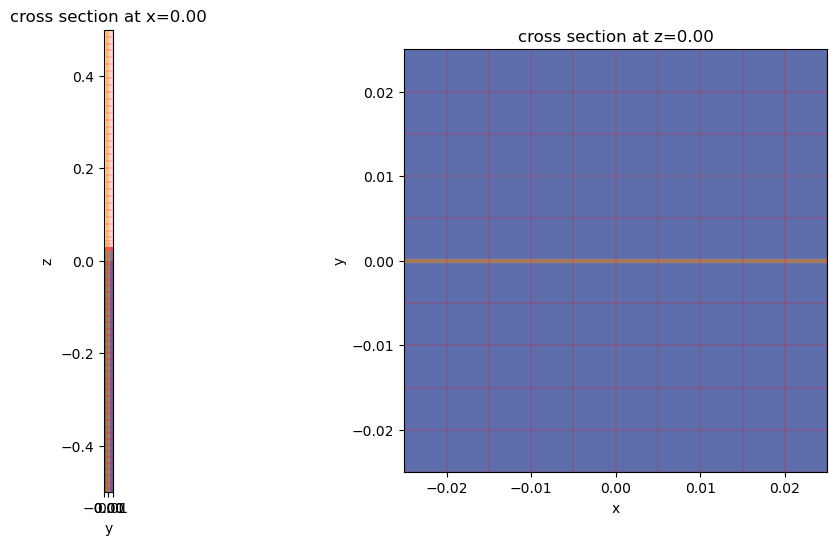

In [5]:

def plot_sim_grid(sim):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sim.plot(x=0, ax=ax[0])
    sim.plot_grid(x=0, ax=ax[0], lw=0.4, colors="r")
    ax[0].set_xlim(-0.01, 0.01)
    ax[0].set_ylim(-0.5, 0.5)
    sim.plot(z=0, ax=ax[1])
    sim.plot_grid(z=0, ax=ax[1], lw=0.4, colors="r")
    # ax[1].set_xlim(-0.6, 0.6)
    # ax[1].set_ylim(-0.4, 0.4)
    print(f"Total number of grid points (millions): {sim.num_cells / 1e6:1.2}")

    return ax
ax = plot_sim_grid(sim)

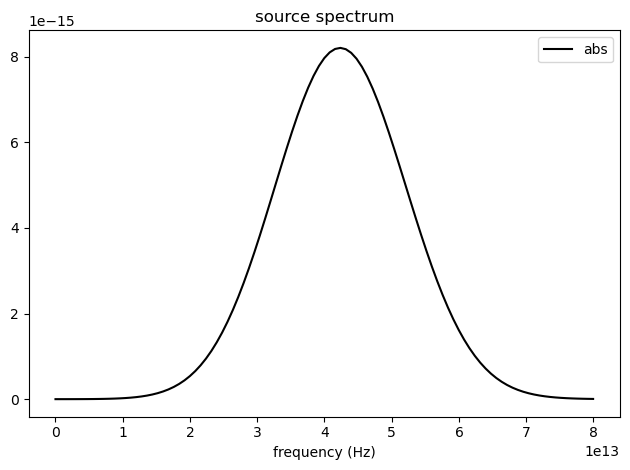

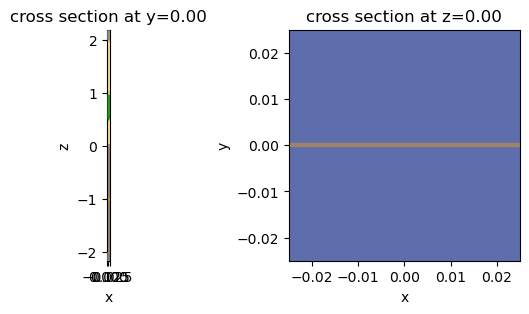

14:55:37 ?????? WARNING: Simulation has 2.10e+06 time steps. The 'run_time' may 
                be unnecessarily large, unless there are very long-lived        
                resonances.                                                     

                Created task 'HVO0.9' with task_id                              
                'fdve-09cc6b8d-97a0-45a6-953f-333a8584d333' and task_type       
                'FDTD'.

                View task using web UI at                                       
                ]8;id=627151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=860104;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\taskId]8;;\]8;id=627151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\=]8;;\]8;id=623497;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\fdve]8;;\]8;id=627151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\-09cc6b8d-]8;;\
                ]8;id=627151;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\97a0-45a6-953f-333a8584d333']8;;\.

E:\software\Anaconda\envs\Tidy3D310\lib\site-packages\rich\live.py:229: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [7]:

source.source_time.plot_spectrum(
    times=np.linspace(0, run_time/10, 2000), val="abs"
)
plt.show()
cfig, ax = plt.subplots(1, 2, figsize=(7, 3))
sim.plot(y=0, ax=ax[0])
sim.plot(z=0, freq=freq0, ax=ax[1])
plt.show()
task_id = web.upload(sim, task_name=f"HVO0.9")

In [8]:

estimated_cost = web.estimate_cost(task_id)
print(f'The estimated maximum cost is {estimated_cost:.3f} Flex Credits.')
web.start(task_id)
web.monitor(task_id, verbose=True)


14:55:45 ?????? Maximum FlexCredit cost: 0.145. Minimum cost depends on task    
                execution details. Use 'web.real_cost(task_id)' to get the      
                billed FlexCredit cost after a simulation run.

The estimated maximum cost is 0.145 Flex Credits.


14:55:46 ?????? status = queued

14:55:50 ?????? status = preprocess

14:55:57 ?????? Maximum FlexCredit cost: 0.145. Use 'web.real_cost(task_id)' to 
                get the billed FlexCredit cost after a simulation run.

                starting up solver

                running solver

                To cancel the simulation, use 'web.abort(task_id)' or           
                'web.delete(task_id)' or abort/delete the task in the web UI.   
                Terminating the Python script will not stop the job running on  
                the cloud.

14:56:21 ?????? early shutoff detected at 4%, exiting.

14:56:22 ?????? status = postprocess

14:56:27 ?????? status = success

                View simulation result at                                       
                ]8;id=923698;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=695369;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\taskId]8;;\]8;id=923698;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\=]8;;\]8;id=602247;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\fdve]8;;\]8;id=923698;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\-09cc6b8d-]8;;\
                ]8;id=923698;https://tidy3d.simulation.cloud/workbench?taskId=fdve-09cc6b8d-97a0-45a6-953f-333a8584d333\97a0-45a6-953f-333a8584d333']8;;\.

In [ ]:

print("Billed flex unit cost: ", web.real_cost(task_id))

15:01:04 ?????? Billed flex credit cost: 0.025.

                Note: the task cost pro-rated due to early shutoff was below the
                minimum threshold, due to fast shutoff. Decreasing the          
                simulation 'run_time' should decrease the estimated, and        
                correspondingly the billed cost of such tasks.

Billed flex unit cost:  0.025


E:\software\Anaconda\envs\Tidy3D310\lib\site-packages\rich\live.py:229: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

15:01:05 ?????? loading simulation from data/HVO0.9.hdf5

                WARNING: Structure at structures[0] was detected as being less  
                than half of a central wavelength from a PML on side z-min. To  
                avoid inaccurate results or divergence, please increase gap     
                between any structures and PML or fully extend structure through
                the pml.                                                        

                WARNING: Suppressed 4 WARNING messages.                         

Simulation domain Nx, Ny, Nz: [10, 10, 318]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 3.2000e+04.
Using subpixel averaging: True
Number of time steps: 2.0980e+06
Automatic shutoff factor: 1.00e-05
Time step (s): 9.5329e-18


Compute source modes time (s):     0.5467
Compute monitor modes time (s):    0.0075
Rest of setup time (s):            2.4187

Running solver for 2098005 time steps...
- Time step   8353 / time 7.96e-14s (  0 % done), field decay: 1.00e+00
- Time step  83920 / time 8.00e-13s (  4 % done), field decay: 5.31e-09
Field decay smaller than shutoff factor, exiting solver.

Solver time (s):                   17.8968
Data write time (s):               0.0038


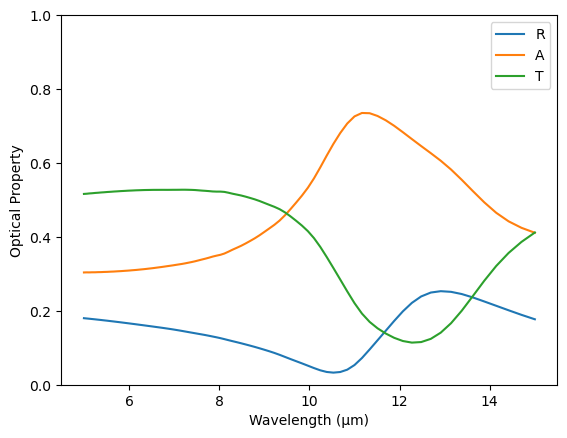

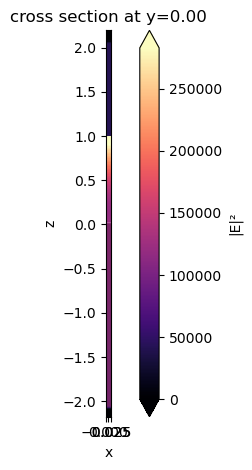

In [13]:

sim_data = web.load(task_id, path=f"data/HVO0.9.hdf5")

# Show the output of the log file
print(sim_data.log)
R = sim_data["R"].flux
T = -sim_data["T"].flux
A = 1 - R - T
plt.plot(td.C_0 /freqs, R, td.C_0 /freqs, A)
plt.plot(td.C_0 /freqs, T)
plt.xlabel("Wavelength (μm)")
plt.ylabel("Optical Property")
plt.ylim(0, 1)
plt.legend(("R", "A", "T"))
plt.show()

ax = sim_data.plot_field(field_monitor_name="field", field_name="E", val="abs^2")
plt.show()
